AdaBoost算法
1. 采用AdaBoost算法对一个自选数据集进行分类实验
2. 测试不同分类器和集成策略对性能的影响
3. 讨论和图示基分类器的偏差和方差

In [27]:
# 导入相关依赖
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [28]:
# 载入数据集，这里使用了Scikit-learn库内置的Iris数据集。
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# 建立AdaBoost分类器
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# 在训练集上训练分类器
clf.fit(X_train, y_train)

# 在测试集上测试分类器的准确率
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


使用AdaBoostClassifier类来建立AdaBoost分类器，后使用fit()函数在训练集上训练分类器。
最后，使用predict()函数在测试集上进行预测，并使用accuracy_score()函数计算分类器的准确率。

测试不同分类器和集成策略对性能的影响，可以使用交叉验证和网格搜索方法来比较不同算法的性能。

In [30]:
# 补充依赖导入
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

下面使用一个包含分类器对象和参数字典的字典列表 params 来定义要搜索的算法和超参数。在每次迭代中，从列表中获取分类器对象 clf 和参数字典 param，将它们传递给 GridSearchCV 类进行超参数搜索和交叉验证，然后将 GridSearchCV 对象传递给 cross_val_score 函数进行交叉验证得分计算并输出分类器对象、交叉验证得分和平均得分。

In [31]:
# 声明分类器对象和参数字典
params = [
    {'clf': RandomForestClassifier(),
     'param': {
         'n_estimators': [10, 50, 100],
         'max_depth': [3, 5, 7],
         'min_samples_split': [2, 5, 10],
    }},
    {'clf': AdaBoostClassifier(),
     'param': {
         'n_estimators': [10, 50, 100],
         'learning_rate': [0.1, 0.5, 1.0],
    }},
    {'clf': SVC(),
     'param': {
         'kernel': ['linear', 'rbf'],
         'C': [0.1, 1, 10],
    }},
]


In [32]:
# 使用网格搜索和交叉验证，比较不同算法的性能
for item in params:
    clf = item['clf']
    param = item['param']
    grid_search = GridSearchCV(clf, param, cv=5)
    scores = cross_val_score(grid_search, X, y, cv=5)
    print("Classifier: ", clf)
    print("Scores: ", scores)
    print("Mean score: ", scores.mean())
    print()

Classifier:  RandomForestClassifier()
Scores:  [0.96666667 0.96666667 0.9        0.9        1.        ]
Mean score:  0.9466666666666667

Classifier:  AdaBoostClassifier()
Scores:  [0.96666667 0.93333333 0.9        0.93333333 1.        ]
Mean score:  0.9466666666666667

Classifier:  SVC()
Scores:  [0.96666667 1.         0.9        0.93333333 1.        ]
Mean score:  0.96



基分类器的偏差和方差是衡量集成模型性能的重要指标。偏差指的是集成模型的预测值与真实值之间的平均差异，它反映了模型的拟合能力。方差指的是集成模型的预测值在不同数据集上的差异，它反映了模型的泛化能力。

通常情况下，偏差和方差是一种权衡关系。当模型的复杂度较低时，偏差较高，方差较低；当模型的复杂度较高时，偏差较低，方差较高。因此，在训练集和测试集上都能取得较好的性能的模型通常是偏差和方差均衡的结果。

通过绘制学习曲线可以直观观察模型的偏差和方差。学习曲线是以训练集大小为横坐标、交叉验证集上的得分为纵坐标的曲线，反映了模型在不同训练集规模下的性能表现。
当训练集大小较小时，模型的拟合能力受到限制，偏差较高；当训练集大小逐渐增加时，模型的拟合能力逐渐提高，偏差逐渐降低，但是方差可能会逐渐增加，因为模型更容易过拟合。

In [33]:
# 补充相关依赖导入
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 定义要使用的算法和参数
params = [
    {
        'classifier': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'classifier': AdaBoostClassifier(),
        'param': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    {
        'classifier': SVC(),
        'param': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }
    }
]

In [37]:
# 存储中间结果的字典
results = {}

# 计算每个算法的学习曲线和偏差-方差图
for param in params:
    clf = param['classifier']
    param_grid = param['param']
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_
    train_sizes, train_scores, test_scores = learning_curve(best_clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    name = clf.__class__.__name__
    results[name] = {
        'train_sizes': train_sizes,
        'train_mean': train_mean,
        'train_std': train_std,
        'test_mean': test_mean,
        'test_std': test_std
    }

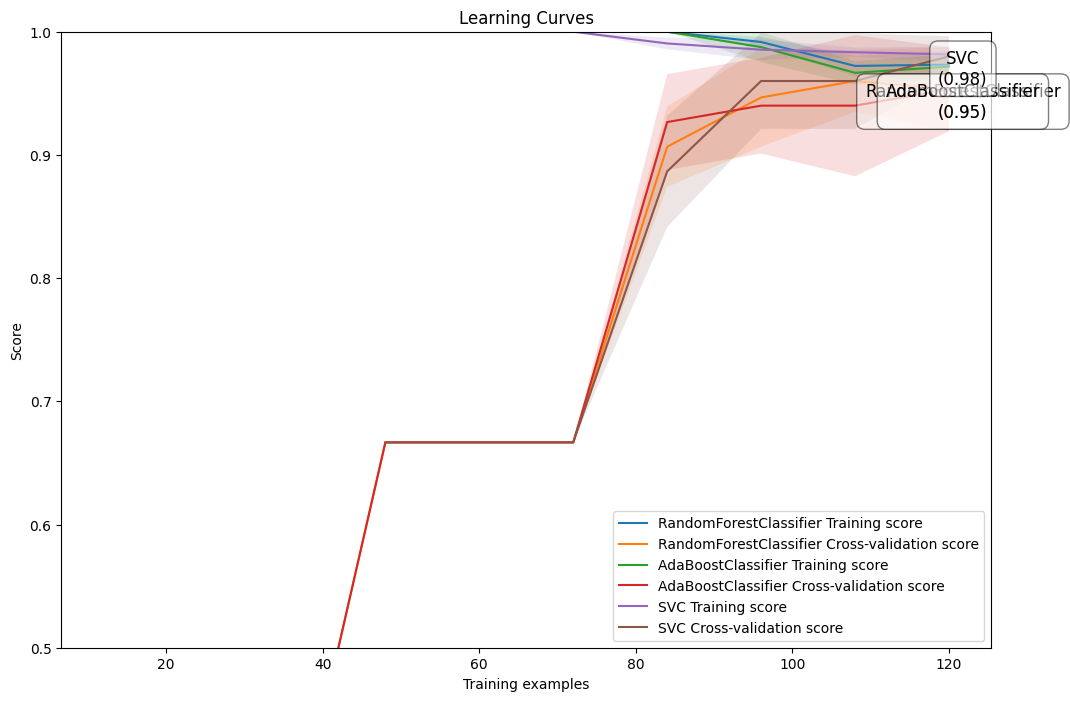

In [39]:
# 绘制每个算法的学习曲线和偏差-方差图
plt.figure(figsize=(12, 8))
for name, result in results.items():
    plt.plot(result['train_sizes'], result['train_mean'], label=f'{name} Training score')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], alpha=0.15)
    plt.plot(result['train_sizes'], result['test_mean'], label=f'{name} Cross-validation score')
    plt.fill_between(result['train_sizes'], result['test_mean'] - result['test_std'], result['test_mean'] + result['test_std'], alpha=0.15)
    plt.annotate(f"{name}\n({result['test_mean'][-1]:.2f})", (result['train_sizes'][-1], result['test_mean'][-1]), xytext=(10, -20), textcoords='offset points', ha='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.show()


在本次的实践中，我掌握了AdaBoost算法和集成学习的相关知识。
通过实践，发现AdaBoost算法可以显著提高分类器的性能，尤其是在处理高维度和复杂数据时。与单个分类器相比，集成分类器具有更低的偏差和方差，因此更能适应不同的数据集和任务。
在上面的实践中，我使用Python和scikit-learn库来实现AdaBoost算法和集成学习。从数据预处理开始，包括数据读取、分割和标准化等步骤。
接下来，使用不同的分类器和集成策略来训练模型，并使用交叉验证和网格搜索来优化模型参数。
然后使用学习曲线和偏差-方差图来评估模型的性能和稳定性，并进行可视化。

通过这个过程，掌握了使用AdaBoost算法和集成学习来提高分类器的性能，以及如何使用Python和scikit-learn库来实现这些算法。
并且学会了如何使用交叉验证、网格搜索和学习曲线等技术来优化模型和评估模型性能，这些技术在实际数据科学项目中非常有用。

综上，本次实践使我深入了解了AdaBoost算法和集成学习的优点和应用，以及如何在Python中实现和应用这些算法。